# **AlloCiné Analysis**

We had web scraped (see [the script here](https://github.com/Bastien-LDC/Allocine-project/blob/master/Webscraping_From_AlloCine.ipynb)) the data from the AlloCiné website. AlloCiné is a company which provides information on French cinema and provide ratings from the press and from their users for a large number of movies.

**Data description :**

- `id` : Allocine movie id
- `title` : the movie's title (in french)
- `release_date`: the original release date
- `duration`: the movies length
- `genres` : the movies types (as an array, up to three different types)
- `directors` : movies directors (as an array)
- `actors` : main characters of the movies (as an array)
- `nationality`: nationality of the movies (as an array)
- `press_rating`: press ratings (from 0 to 5 stars)
- `nb_press_rating`: number of press votes
- `user_rating`:  AlloCiné users ratings (from 0 to 5 stars)
- `nb_user_rating`: number of users votes
- `summary`: short summary of the movie in french

If you are interested in, the data is available on one csv (brut and clean version) [allocine_dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_dataset.zip) or in multiple csv files (clean version only) [allocine_rel-dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_rel-dataset.zip).

# **Data cleaning**

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Load the csv
allocine = pd.read_csv("Movies/allocine_movies.csv", nrows=300)
cols = allocine.columns

In [6]:
# Rename (nb_)spec_rating to (nb_)user_rating
allocine.rename(columns={'spec_rating':'user_rating', 'nb_spec_rating':'nb_user_rating'}, inplace=True)

In [7]:
allocine.head()

,id,title,release_date,duration,genres,directors,actors,nationality,press_rating,nb_press_rating,user_rating,nb_user_rating,summary,poster_link
0,211012,The Batman,2022-03-02,177,"Action, Policier, Thriller","Matt Reeves, Peter Craig","Robert Pattinson, Zoë Kravitz, Paul Dano",américain,3.9,37.0,4.2,9870.0,Deux années à arpenter les rues en tant que Ba...,https://fr.web.img3.acsta.net/c_310_420/pictur...
1,281976,Goliath,2022-03-09,122,Thriller,"Frédéric Tellier, Simon Moutaïrou","Gilles Lellouche, Pierre Niney, Emmanuelle Bercot",français,3.5,30.0,4.0,2895.0,"France, professeure de sport le jour, ouvrière...",https://fr.web.img3.acsta.net/c_310_420/pictur...
2,287738,En corps,2022-03-30,120,"Comédie dramatique, Drame, Comédie","Cédric Klapisch, Santiago Amigorena","Marion Barbeau, Hofesh Shechter, Denis Podalydès",français,3.4,32.0,4.2,1405.0,"Elise, 26 ans est une grande danseuse classiqu...",https://fr.web.img4.acsta.net/c_310_420/pictur...
3,42303,Permis de construire,2022-03-09,93,Comédie,"Eric Fraticelli, Didier Bourdon","Didier Bourdon, Eric Fraticelli, Anne Consigny",français,1.8,4.0,3.1,669.0,"Dentiste à Paris, Romain vient de perdre son p...",https://fr.web.img6.acsta.net/c_310_420/pictur...
4,284864,Notre-Dame brûle,2022-03-16,110,Drame,"Jean-Jacques Annaud, Thomas Bidegain","Samuel Labarthe, Jean-Paul Bordes, Mikaël Chir...",français,3.5,32.0,4.0,1768.0,"Le long métrage de Jean-Jacques Annaud, recons...",https://fr.web.img6.acsta.net/c_310_420/pictur...


In [225]:
allocine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               298 non-null    int64  
 1   title            298 non-null    object 
 2   release_date     297 non-null    object 
 3   duration         289 non-null    float64
 4   genres           298 non-null    object 
 5   directors        297 non-null    object 
 6   actors           296 non-null    object 
 7   nationality      298 non-null    object 
 8   press_rating     241 non-null    float64
 9   nb_press_rating  241 non-null    float64
 10  user_rating      269 non-null    float64
 11  nb_user_rating   269 non-null    float64
 12  summary          298 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 32.6+ KB


In [226]:
# Convert the strings to arrays
allocine["genres"] = allocine["genres"].apply(lambda x: x.split(",") if type(x) != float else [])
allocine["directors"] = allocine["directors"].apply(lambda x: x.split(",") if type(x) != float else [])
allocine["actors"] = allocine["actors"].apply(lambda x: x.split(",") if type(x) != float else [])
allocine["nationality"] = allocine["nationality"].apply(lambda x: x.split(",") if type(x) != float else [])

In [227]:
# Get columns with NaN values
cols_nan = allocine.columns[allocine.isna().any()].tolist()

In [228]:
# Drop NaN values for movies with missing values
allocine = allocine.dropna(subset=cols_nan).reset_index(drop=True)

In [229]:
# Convert nb_spec_rating and nb_press_rating to int
allocine[["nb_press_rating","nb_user_rating"]] = allocine[["nb_press_rating","nb_user_rating"]].astype(int)

In [230]:
allocine.shape
nb_movies = allocine.shape[0]

# **Section 1. Ratings Distributions**

## Plot the Distribution of Ratings 

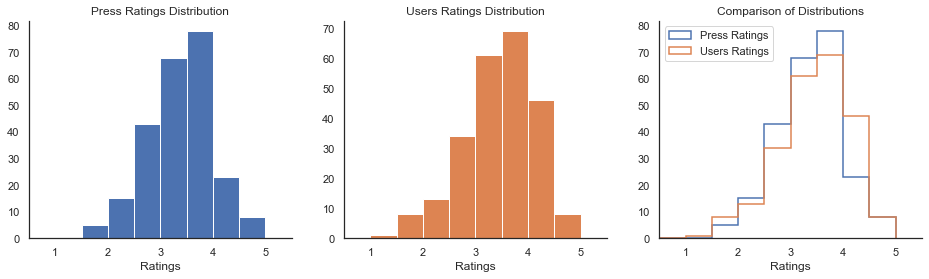

In [231]:
sns.set(style="white", palette="deep")

fig, axes = plt.subplots(1, 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.set_xlim([0.5,5.5])
ax2.set_xlim([0.5,5.5])
ax3.set_xlim([0.5,5.5])


ax1.hist(allocine["press_rating"], bins = 10, range = (0,5), color='C0') # bin range = 1
ax1.set_title('Press Ratings Distribution')
ax1.set_xlabel('Ratings')

ax2.hist(allocine["user_rating"], bins = 10, range = (0,5), color='C1') # bin range = 1
ax2.set_title('Users Ratings Distribution')
ax2.set_xlabel('Ratings')

ax3.hist(allocine["press_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Press Ratings', color='C0')
ax3.hist(allocine["user_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Users Ratings', color='C1')
ax3.legend(loc = 'upper left')
ax3.set_title('Comparison of Distributions')
ax3.set_xlabel('Ratings')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [232]:
# save the fig
fig.savefig('allocine-0_hist.png', bbox_inches='tight', dpi=200)

## Ratings Correlation

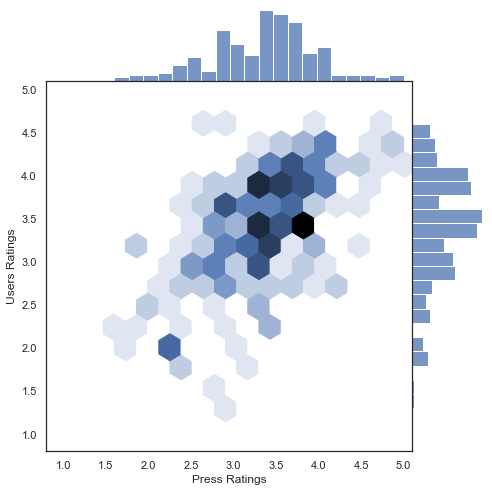

In [233]:
# Correlation between press_rating and user_rating
ax = sns.jointplot(x="press_rating", y="user_rating", 
                   data=allocine, kind="hex",
                   marginal_kws=dict(bins=20),
                   xlim=(0.8,5.1), ylim=(0.8,5.1),
                   height=7, space=0).set_axis_labels("Press Ratings", "Users Ratings")

In [234]:
# save the fig
ax.savefig('allocine-1_jointplot.png', bbox_inches='tight', dpi=200)

# **Section 2. Five Stars Movies Analysis**

The press seems to give much more hightest ratings than AlloCiné users. We need to dig a little bit more to see what happening here. In this section we use a subset of the data where press ratings are five stars. 

## Compare to users ratings

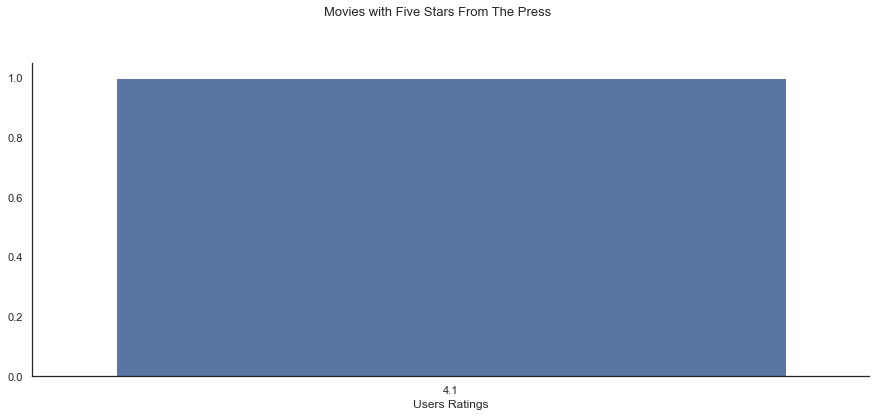

In [255]:
five_stars = allocine[allocine["press_rating"] >= 5]
f, ax = plt.subplots(figsize=(15,6))
f.suptitle('Movies with Five Stars From The Press', 
           fontsize=13)
f.subplots_adjust(top=0.85)

sns.countplot(x=five_stars["user_rating"], ax=ax)
ax.set_xlabel("Users Ratings")
ax.set_ylabel("")
sns.despine(top=True, right=True, left=False, bottom=False)

In [256]:
# save the fig
f.savefig('allocine-2_hist5stars.png', bbox_inches='tight', dpi=200)

In [258]:
# print the first tier and second tier of the Users Ratings
allocine[["user_rating"]].quantile([.33,.66])

,user_rating
0.33,3.2
0.66,3.7


In [259]:
p = (len(five_stars[(five_stars["user_rating"] < 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a low users ratings.'.format(round(p, 2)))
p = (len(five_stars[(five_stars["user_rating"] < 3.4) & (five_stars["user_rating"] >= 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a moderate users ratings.'.format(round(p, 2)))
p = (len(five_stars[five_stars["user_rating"] >= 3.4]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a high users ratings.'.format(round(p, 2)))

0.0 % of the movies with the highest press ratings received a low users ratings.
0.0 % of the movies with the highest press ratings received a moderate users ratings.
100.0 % of the movies with the highest press ratings received a high users ratings.


# **Section 3. Data Exploration**

## **GENRE**

### Number of movies per genre

#### *Get all genres*

In [235]:
# Get all unique genres from list of genres
genres = [genre.lstrip() for genres in allocine["genres"] for genre in genres]
genres = sorted(list(set(genres)))
genres

['Action',
 'Animation',
 'Arts Martiaux',
 'Aventure',
 'Biopic',
 'Comédie',
 'Comédie dramatique',
 'Comédie musicale',
 'Drame',
 'Epouvante-horreur',
 'Erotique',
 'Espionnage',
 'Famille',
 'Fantastique',
 'Guerre',
 'Historique',
 'Musical',
 'Policier',
 'Romance',
 'Science fiction',
 'Sport event',
 'Thriller',
 'Western']

#### *Create a `genre` dataframe*

In [237]:
# Create dataframe with the number of movies per genre from genre list
genre_df = pd.DataFrame({"genre": genres, "nb_movies": [allocine[allocine["genres"].apply(lambda x: genre in x).values].shape[0] for genre in genres]})

# Add the nb_press_rating and nb_user_rating to the genre_df
genre_df["nb_press_rating"] = [allocine[allocine["genres"].apply(lambda x: genre in x).values]["nb_press_rating"].sum() for genre in genres]
genre_df["nb_user_rating"] = [allocine[allocine["genres"].apply(lambda x: genre in x).values]["nb_user_rating"].sum() for genre in genres]

# Add the total_ rating to the genre_df (press_rating + user_rating)
genre_df["total_rating"] = genre_df["nb_press_rating"] + genre_df["nb_user_rating"]

# Add the press_rating_percentage and user_rating_percentage to the genre_df 
genre_df["press_rating_percentage"] = round(genre_df["nb_press_rating"] / genre_df["nb_press_rating"].values.sum() * 100, 2)
genre_df["user_rating_percentage"] = round(genre_df["nb_user_rating"] / genre_df["nb_user_rating"].values.sum() * 100, 2)

# Add the movie_percentage to the genre_df
genre_df["movie_percentage"] = round(genre_df["nb_movies"]/nb_movies * 100, 2)
genre_df

,genre,nb_movies,nb_press_rating,nb_user_rating,total_rating,press_rating_percentage,user_rating_percentage,movie_percentage
0,Action,22,430,361958,362388,8.37,20.92,9.17
1,Animation,14,193,42971,43164,3.76,2.48,5.83
2,Arts Martiaux,0,0,0,0,0.00,0.00,0.00
3,Aventure,10,183,31478,31661,3.56,1.82,4.17
4,Biopic,4,103,6626,6729,2.00,0.38,1.67
5,Comédie,40,737,92934,93671,14.34,5.37,16.67
6,Comédie dramatique,17,414,61644,62058,8.06,3.56,7.08
7,Comédie musicale,2,69,6836,6905,1.34,0.40,0.83
8,Drame,73,1776,326096,327872,34.56,18.84,30.42
9,Epouvante-horreur,3,77,16093,16170,1.50,0.93,1.25


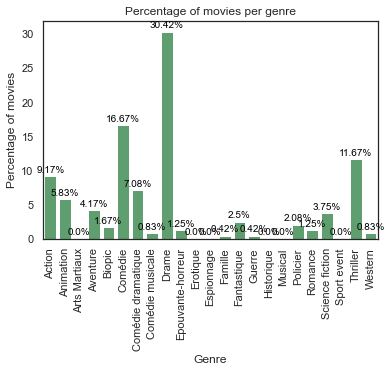

In [154]:
# Hist of the percentage of movies per genre
ax = sns.barplot(x="genre", y="movie_percentage", data=genre_df, color="C2")
ax.set_title("Percentage of movies per genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage of movies")

# Pretty print x axis names
for i, genre in enumerate(ax.get_xticklabels()):
    genre.set_rotation(90)
    genre.set_horizontalalignment('center')
    genre.set_position((i, 0))

# Print the data values on top of the bars
for i, genre in enumerate(ax.patches):
    ax.text(genre.get_x() + genre.get_width()/2.,
            genre.get_height() + 0.5,
            str(genre_df.iloc[i]["movie_percentage"]) + "%",
            ha='center',
            color='black',
            fontsize=10)

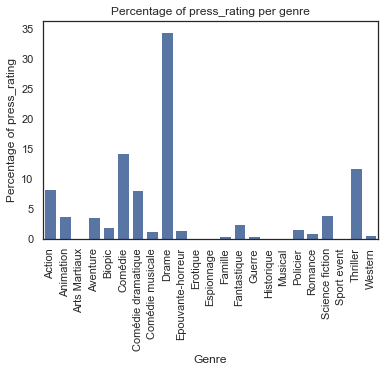

In [240]:
# Hist of the percentage of press_rating per genre
ax = sns.barplot(x="genre", y="press_rating_percentage", data=genre_df, color="C0")
ax.set_title("Percentage of press_rating per genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage of press_rating")

# Pretty print x axis names
for i, genre in enumerate(ax.get_xticklabels()):
    genre.set_rotation(90)
    genre.set_horizontalalignment('center')
    genre.set_position((i, 0))

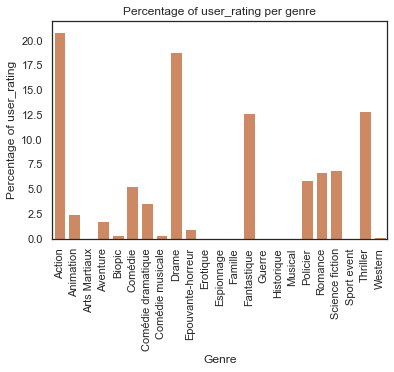

In [241]:
# Hist of the percentage of user_rating per genre
ax = sns.barplot(x="genre", y="user_rating_percentage", data=genre_df, color="C1")
ax.set_title("Percentage of user_rating per genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage of user_rating")

# Pretty print x axis names
for i, genre in enumerate(ax.get_xticklabels()):
    genre.set_rotation(90)
    genre.set_horizontalalignment('center')
    genre.set_position((i, 0))

### Number of ratings per genre

['duration']

### Average ratings per genre

## **NATIONALITY**